Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import pickle


Load Dataset

In [2]:
import pandas as pd
df = pd.read_csv("House Price Prediction Dataset.csv")



Data Understanding

In [3]:
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [4]:
df.tail()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119
1999,2000,2989,5,1,3,1903,Suburban,Fair,No,482525


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [6]:
df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


Data preprocessing

Check Null Values

In [7]:
print(df.isnull().sum())
# Output shows 0 for all columns → No missing values


Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


Check Duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

Remove Duplicates

In [9]:
df.drop_duplicates(inplace=True)


Remove Unnecessary Columns

In [10]:
if 'Id' in df.columns:
    df.drop('Id', axis=1, inplace=True)


In [11]:
df.dtypes

Area          int64
Bedrooms      int64
Bathrooms     int64
Floors        int64
YearBuilt     int64
Location     object
Condition    object
Garage       object
Price         int64
dtype: object

In [12]:
df = pd.get_dummies(df, drop_first=True)


Data Type Conversion

In [13]:
df = df.astype(float)


In [14]:
df.dtypes

Area                 float64
Bedrooms             float64
Bathrooms            float64
Floors               float64
YearBuilt            float64
Price                float64
Location_Rural       float64
Location_Suburban    float64
Location_Urban       float64
Condition_Fair       float64
Condition_Good       float64
Condition_Poor       float64
Garage_Yes           float64
dtype: object

Feature Engineering

In [15]:
if 'Price' in df.columns and 'Area' in df.columns:
    df['Price_per_sqft'] = df['Price'] / df['Area']


Feature Selection

In [16]:
X = df.drop('Price', axis=1)   # Independent variables
y = df['Price']               # Dependent variable


Feature Scaling

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Splitting Data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


Model Selection

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Model Prediction

In [20]:
y_pred = model.predict(X_test)


Model Evaluation

In [21]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MSE: 40063524346.21262
RMSE: 200158.74786332127
R2 Score: 0.48503692011294


Save Model 

In [22]:
with open("linear_regression_model1.pkl", "wb") as file:
    pickle.dump(model, file)


Save Scaler

In [23]:
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)


Load Model Later

In [24]:
with open("linear_regression_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

with open("scaler.pkl", "rb") as file:
    loaded_scaler = pickle.load(file)


FileNotFoundError: [Errno 2] No such file or directory: 'linear_regression_model.pkl'

In [ ]:
print(model)


LinearRegression()


Distribution of House Prices (Target Variable)

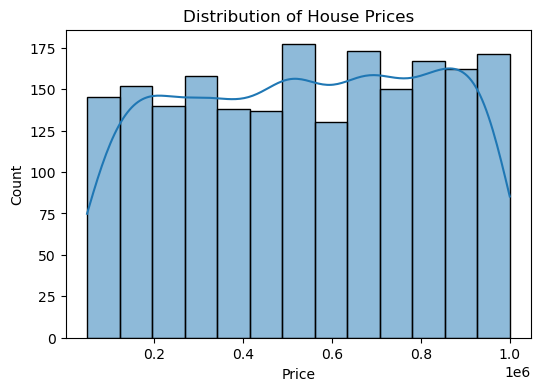

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['Price'], kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


Box Plot (Check Outliers)

Scatter Plot (Example: Area vs Price)

Correlation Heatmap"Shows which features affect price most"

Feature Distribution

Actual vs Predicted Prices

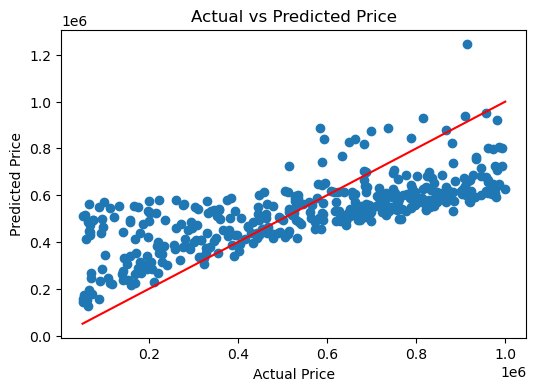

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')
plt.show()


Residual Plot

Linear Regression Line (Single Feature Case)